In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import tkinter as tk
from tkinter import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import time

In [151]:
train_data = pd.read_csv("D:\\project data mining\\train.csv")
test_data = pd.read_csv("D:\\project data mining\\test.csv")

movie_data = [train_data,test_data]
final_data = pd.concat(movie_data)

split_1 = int(0.8 * len(final_data))
split_2 = int(0.9 * len(final_data))
train_data = final_data[:split_1]
dev_data = final_data[split_1:split_2]
test_data = final_data[split_2:]


In [152]:
train_data.info

<bound method DataFrame.info of                                                     text sentiment
0      Now, I won't deny that when I purchased this o...       neg
1      The saddest thing about this "tribute" is that...       neg
2      Last night I decided to watch the prequel or s...       neg
3      I have to admit that i liked the first half of...       neg
4      I was not impressed about this film especially...       neg
...                                                  ...       ...
14995  Reading through most of the other reviews, I t...       neg
14996  Like many western Pennsylvania history buffs, ...       neg
14997  For all its wonderful images, for all of its g...       neg
14998  Hadn't really heard too much about this movie ...       neg
14999  This is definitely an excellent show. I don't ...       pos

[40000 rows x 2 columns]>

In [153]:
test_data.info

<bound method DataFrame.info of                                                     text sentiment
20000  This movie is not a remake of She's all That (...       neg
20001  Theres not much you can really say about this ...       neg
20002  Admittedly, there are some scenes in this movi...       pos
20003  Diane Lane, Mickey Rourke, Rosario Dawson & Th...       neg
20004  A rather disappointing film. The club scenes w...       neg
...                                                  ...       ...
24995  For one thing, he produced this movie. It has ...       neg
24996  The title comes from an alteration an adolesce...       pos
24997  Christopher Nolan's first film is a 'no budget...       pos
24998  The story is shortly about the faith-lacking b...       neg
24999  I found parts of this movie rather slow, espec...       pos

[5000 rows x 2 columns]>

In [154]:
dev_data.info

<bound method DataFrame.info of                                                     text sentiment
15000  This movie is a gay love story disguised as a ...       neg
15001  This is one of my all time favourites. All the...       pos
15002  I was on a British Airways flight from London ...       neg
15003  Pink Flamingos: A Representation of Society's ...       pos
15004  OK, so this film is well acted. It has good di...       neg
...                                                  ...       ...
19995  (This might have a spoiler)<br /><br />When I ...       neg
19996  Thats what this movie really takes. A big piec...       neg
19997  If you like bad movies (and you must to watch ...       neg
19998  This movie deserved better. Mike Judge's satir...       pos
19999  i watched it because my friend said we could t...       pos

[5000 rows x 2 columns]>

In [155]:
train_data.head(5)

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg


In [156]:
test_data.head(5)

,text,sentiment
20000,This movie is not a remake of She's all That (...,neg
20001,Theres not much you can really say about this ...,neg
20002,"Admittedly, there are some scenes in this movi...",pos
20003,"Diane Lane, Mickey Rourke, Rosario Dawson & Th...",neg
20004,A rather disappointing film. The club scenes w...,neg


In [157]:
dev_data.head(5)

,text,sentiment
15000,This movie is a gay love story disguised as a ...,neg
15001,This is one of my all time favourites. All the...,pos
15002,I was on a British Airways flight from London ...,neg
15003,Pink Flamingos: A Representation of Society's ...,pos
15004,"OK, so this film is well acted. It has good di...",neg


In [158]:
sentiment_int = []
for index, row  in train_data.iterrows():
    if row['sentiment'] == 'pos':
        sentiment_int.append(1)
    else:
        sentiment_int.append(0)

train_data["sentiment_int"] = sentiment_int


sentiment_int = []
for index, row  in test_data.iterrows():
    if row['sentiment'] == 'pos':
        sentiment_int.append(1)
    else:
        sentiment_int.append(0)

test_data["sentiment_int"] = sentiment_int


sentiment_int = []
for index, row  in dev_data.iterrows():
    if row['sentiment'] == 'pos':
        sentiment_int.append(1)
    else:
        sentiment_int.append(0)

dev_data["sentiment_int"] = sentiment_int

<ipython-input-158-d6dcc58f8bb7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["sentiment_int"] = sentiment_int
<ipython-input-158-d6dcc58f8bb7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["sentiment_int"] = sentiment_int
<ipython-input-158-d6dcc58f8bb7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [159]:
train_data.head(10)

,text,sentiment,sentiment_int
0,"Now, I won't deny that when I purchased this o...",neg,0
1,"The saddest thing about this ""tribute"" is that...",neg,0
2,Last night I decided to watch the prequel or s...,neg,0
3,I have to admit that i liked the first half of...,neg,0
4,I was not impressed about this film especially...,neg,0
5,"The original movie, The Odd Couple, has some w...",pos,1
6,"This was a great movie with a good cast, all o...",pos,1
7,"I'm a sucker for a good romance, but this one ...",neg,0
8,"Fast-paced, funny, sexy, and spectacular. Cagn...",pos,1
9,"The proverb ""Never judge a book by it's cover""...",neg,0


In [160]:
test_data.head(10)

,text,sentiment,sentiment_int
20000,This movie is not a remake of She's all That (...,neg,0
20001,Theres not much you can really say about this ...,neg,0
20002,"Admittedly, there are some scenes in this movi...",pos,1
20003,"Diane Lane, Mickey Rourke, Rosario Dawson & Th...",neg,0
20004,A rather disappointing film. The club scenes w...,neg,0
20005,Too bad Mike Meyers picked this for his dramat...,neg,0
20006,This is one of my favourite books and I rememb...,pos,1
20007,"The three-part series ended last night on PBS,...",pos,1
20008,I bought the DVD a long time ago and finally g...,pos,1
20009,"The Squire of Gothos is one of the ""sillier"" e...",pos,1


In [161]:
dev_data.head()

,text,sentiment,sentiment_int
15000,This movie is a gay love story disguised as a ...,neg,0
15001,This is one of my all time favourites. All the...,pos,1
15002,I was on a British Airways flight from London ...,neg,0
15003,Pink Flamingos: A Representation of Society's ...,pos,1
15004,"OK, so this film is well acted. It has good di...",neg,0


In [162]:
nRow, nCol = train_data.shape
print(f'There are {nRow} rows and {nCol} columns of training data')

There are 40000 rows and 3 columns of training data


In [163]:
nRow, nCol = test_data.shape
print(f'There are {nRow} rows and {nCol} columns of test data')

There are 5000 rows and 3 columns of test data


In [164]:
nRow, nCol = dev_data.shape
print(f'There are {nRow} rows and {nCol} columns of development data')

There are 5000 rows and 3 columns of development data


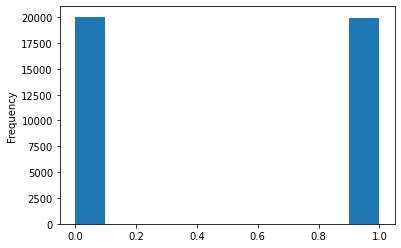

In [165]:
train_data['sentiment_int'].plot.hist()
plt.show()

<AxesSubplot:ylabel='Frequency'>

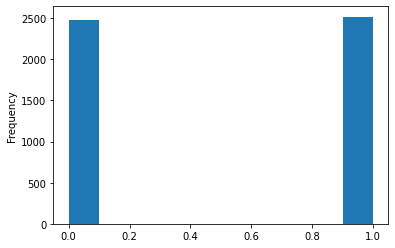

In [166]:
test_data['sentiment_int'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

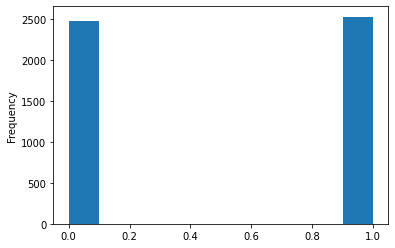

In [167]:
dev_data['sentiment_int'].plot.hist()

In [168]:
train_len = len(train_data)
print('total train records:', train_len)

pos_len = len(train_data[train_data['sentiment_int'] == 1])
neg_len = len(train_data[train_data['sentiment_int'] == 0])

print ('positive records:', pos_len)
print ('negative records:', neg_len)

total train records: 40000
positive records: 19955
negative records: 20045


In [169]:
test_len = len(test_data)
print('total train records:', test_len)

pos_len = len(test_data[test_data['sentiment_int'] == 1])
neg_len = len(test_data[test_data['sentiment_int'] == 0])

print ('positive records:', pos_len)
print ('negative records:', neg_len)

total train records: 5000
positive records: 2517
negative records: 2483


In [170]:
dev_len = len(dev_data)
print('total train records:', dev_len)

pos_len = len(dev_data[dev_data['sentiment_int'] == 1])
neg_len = len(dev_data[dev_data['sentiment_int'] == 0])

print ('positive records:', pos_len)
print ('negative records:', neg_len)

total train records: 5000
positive records: 2528
negative records: 2472


In [171]:
print(f'Number of duplicates in the data = {train_data.duplicated().sum()}')

Number of duplicates in the data = 253


In [172]:
movie_train = train_data.drop_duplicates(subset=None, keep='first')
movie_train

,text,sentiment,sentiment_int
0,"Now, I won't deny that when I purchased this o...",neg,0
1,"The saddest thing about this ""tribute"" is that...",neg,0
2,Last night I decided to watch the prequel or s...,neg,0
3,I have to admit that i liked the first half of...,neg,0
4,I was not impressed about this film especially...,neg,0
...,...,...,...
14995,"Reading through most of the other reviews, I t...",neg,0
14996,"Like many western Pennsylvania history buffs, ...",neg,0
14997,"For all its wonderful images, for all of its g...",neg,0
14998,Hadn't really heard too much about this movie ...,neg,0


In [173]:
print(f'Number of duplicates in the data = {test_data.duplicated().sum()}')

Number of duplicates in the data = 8


In [174]:
movie_test = test_data.drop_duplicates(subset=None, keep='first')
movie_test

,text,sentiment,sentiment_int
20000,This movie is not a remake of She's all That (...,neg,0
20001,Theres not much you can really say about this ...,neg,0
20002,"Admittedly, there are some scenes in this movi...",pos,1
20003,"Diane Lane, Mickey Rourke, Rosario Dawson & Th...",neg,0
20004,A rather disappointing film. The club scenes w...,neg,0
...,...,...,...
24995,"For one thing, he produced this movie. It has ...",neg,0
24996,The title comes from an alteration an adolesce...,pos,1
24997,Christopher Nolan's first film is a 'no budget...,pos,1
24998,The story is shortly about the faith-lacking b...,neg,0


In [175]:
print(f'Number of duplicates in the data = {dev_data.duplicated().sum()}')

Number of duplicates in the data = 5


In [176]:
movie_dev = dev_data.drop_duplicates(subset=None, keep='first')
movie_dev

,text,sentiment,sentiment_int
15000,This movie is a gay love story disguised as a ...,neg,0
15001,This is one of my all time favourites. All the...,pos,1
15002,I was on a British Airways flight from London ...,neg,0
15003,Pink Flamingos: A Representation of Society's ...,pos,1
15004,"OK, so this film is well acted. It has good di...",neg,0
...,...,...,...
19995,(This might have a spoiler)<br /><br />When I ...,neg,0
19996,Thats what this movie really takes. A big piec...,neg,0
19997,If you like bad movies (and you must to watch ...,neg,0
19998,This movie deserved better. Mike Judge's satir...,pos,1


In [177]:
train_data.isnull().sum()

text             0
sentiment        0
sentiment_int    0
dtype: int64

In [178]:
train_data.isnull().sum()

text             0
sentiment        0
sentiment_int    0
dtype: int64

In [179]:
train_data

,text,sentiment,sentiment_int
0,"Now, I won't deny that when I purchased this o...",neg,0
1,"The saddest thing about this ""tribute"" is that...",neg,0
2,Last night I decided to watch the prequel or s...,neg,0
3,I have to admit that i liked the first half of...,neg,0
4,I was not impressed about this film especially...,neg,0
...,...,...,...
14995,"Reading through most of the other reviews, I t...",neg,0
14996,"Like many western Pennsylvania history buffs, ...",neg,0
14997,"For all its wonderful images, for all of its g...",neg,0
14998,Hadn't really heard too much about this movie ...,neg,0


In [180]:
ratings_counts = train_data['sentiment_int'].value_counts().sort_index(ascending=False)
print("Count of each rating value:\n", ratings_counts)

Count of each rating value:
 1    19955
0    20045
Name: sentiment_int, dtype: int64


[(9955.0, 25045.0)]

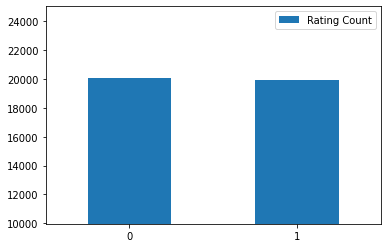

In [181]:
ratings_count_list = sorted(ratings_counts.items(), key=operator.itemgetter(1), reverse=False)
min_count = ratings_count_list[0][1]

ratings_count_list = sorted(ratings_counts.items(), key=operator.itemgetter(1), reverse=True)
max_count = ratings_count_list[0][1]

ratings_count_list = sorted(ratings_counts.items(), key=operator.itemgetter(0), reverse=False)

ratingVal = [item[0] for item in ratings_count_list]
countVal = [item[1] for item in ratings_count_list]

df = pd.DataFrame({'Rating Count': countVal}, index=ratingVal)

ax = df.plot.bar(rot=0)
ax.set(ylim=[min_count-10000, max_count+5000])

In [182]:
small_df = train_data.groupby('sentiment_int').apply(lambda x: x.sample(frac=0.8))
original_len_small_df = len(small_df)
print(original_len_small_df)

32000


In [183]:
tfidfconverter = TfidfVectorizer(min_df=0.002)

# For train data - use fit_transform
X_train = tfidfconverter.fit_transform(train_data['text']).toarray()

# For dev and test - use transform
X_dev_arr = tfidfconverter.transform(dev_data['text']).toarray()
X_test_arr = tfidfconverter.transform(test_data['text']).toarray()
X_dev = tfidfconverter.transform(dev_data['text'])
X_test = tfidfconverter.transform(test_data['text'])

# Put 'rating' column of each dataframe into y
y_train = np.asarray(train_data['sentiment_int'])
y_dev = np.asarray(dev_data['sentiment_int'])
y_test = np.asarray(test_data['sentiment_int'])

In [184]:
mse_dict = dict()
accuracy_dict = dict()
classifier_dict = dict()

In [185]:
start_time = time.time()

# Train and Predict the data using Multinomial Naive Bayes
multinomialNB = MultinomialNB(alpha=1)
multinomialNB.fit(X_train, y_train)
classifier_dict["Multinomial Naive Bayes"] = multinomialNB;
y_pred_mnb_dev = multinomialNB.predict(X_dev)

# Calculate the Mean Squared Error and Accuracy
mse_mnb_dev = mean_squared_error(y_test, y_pred_mnb_dev)
accuracy_mnb_dev = accuracy_score(y_test, y_pred_mnb_dev)*100

# Print the Mean Squared Error and Accuracy
print("Using Multinomial Naive Bayes:")
print("Mean Squared Error:", mse_mnb_dev)
print("Accuracy:", accuracy_mnb_dev)

# Store the Mean Squared Error and Accuracy in dictionaries
mse_dict["Multinomial Naive Bayes"] = mse_mnb_dev;
accuracy_dict["Multinomial Naive Bayes"] = accuracy_mnb_dev;

end_time = time.time()
print("runtime: %s sec" % (end_time - start_time))

Using Multinomial Naive Bayes:
Mean Squared Error: 0.503
Accuracy: 49.7
runtime: 1.0030219554901123 sec


In [186]:
start_time = time.time()

# Train and Predict the data using Linear SVM (C=1)
linearSVC1 = LinearSVC(C=1, dual=False)
linearSVC1.fit(X_train, y_train)
classifier_dict["Linear SVC (C=1)"] = linearSVC1;
y_pred_lsvc = linearSVC1.predict(X_dev)

# Calculate the Mean Squared Error and Accuracy
mse_lsvc1_dev = mean_squared_error(y_test, y_pred_lsvc)
accuracy_lsvc1_dev = accuracy_score(y_test, y_pred_lsvc)*100

# Print the Mean Squared Error and Accuracy
print("Using Linear SVC (C=1):")
print('Mean Squared Error:', mse_lsvc1_dev)
print('Accuracy:', accuracy_lsvc1_dev)

# Store the Mean Squared Error and Accuracy in dictionaries
mse_dict["Linear SVC (C=1)"] = mse_lsvc1_dev;
accuracy_dict["Linear SVC (C=1)"] = accuracy_lsvc1_dev;

end_time = time.time()
print("runtime: %s sec" % (end_time - start_time))

Using Linear SVC (C=1):
Mean Squared Error: 0.5068
Accuracy: 49.32
runtime: 3.310098171234131 sec


In [187]:
start_time = time.time()

# Train and Predict the data using Linear SVM (C=100)
linearSVC100 = LinearSVC(C=100, dual=False)
linearSVC100.fit(X_train, y_train)
classifier_dict["Linear SVC (C=100)"] = linearSVC100;
y_pred_lsvc = linearSVC100.predict(X_dev)

# Calculate the Mean Squared Error and Accuracy
mse_lsvc100_dev = mean_squared_error(y_test, y_pred_lsvc)
accuracy_lsvc100_dev = accuracy_score(y_test, y_pred_lsvc)*100

# Print the Mean Squared Error and Accuracy
print("Using Linear SVC (C=100):")
print('Mean Squared Error:', mse_lsvc100_dev)
print('Accuracy:', accuracy_lsvc100_dev)

# Store the Mean Squared Error and Accuracy in dictionaries
mse_dict["Linear SVC (C=100)"] = mse_lsvc100_dev;
accuracy_dict["Linear SVC (C=100)"] = accuracy_lsvc100_dev;

end_time = time.time()
print("runtime: %s sec" % (end_time - start_time))

Using Linear SVC (C=100):
Mean Squared Error: 0.5036
Accuracy: 49.64
runtime: 4.974186897277832 sec


In [188]:
start_time = time.time()

# Train and Predict the data using Linear SVM (C=1000)
linearSVC1000 = LinearSVC(C=1000, dual=False)
linearSVC1000.fit(X_train, y_train)
classifier_dict["Linear SVC (C=1000)"] = linearSVC1000;
y_pred_lsvc = linearSVC1000.predict(X_dev)

# Calculate the Mean Squared Error and Accuracy
mse_lsvc1000_dev = mean_squared_error(y_test, y_pred_lsvc)
accuracy_lsvc1000_dev = accuracy_score(y_test, y_pred_lsvc)*100

# Print the Mean Squared Error and Accuracy
print("Using Linear SVC (C=1000):")
print('Mean Squared Error:', mse_lsvc1000_dev)
print('Accuracy:', accuracy_lsvc1000_dev)

# Store the Mean Squared Error and Accuracy in dictionaries
mse_dict["Linear SVC (C=1000)"] = mse_lsvc1000_dev;
accuracy_dict["Linear SVC (C=1000)"] = accuracy_lsvc1000_dev;

end_time = time.time()
print("runtime: %s sec" % (end_time - start_time))


Using Linear SVC (C=1000):
Mean Squared Error: 0.5052
Accuracy: 49.480000000000004
runtime: 6.243682384490967 sec


In [189]:
start_time = time.time()

# Train and Predict the data using Random Forest Classifier (n_estimators=10)
randomForest10 = RandomForestClassifier(max_depth=100, n_estimators=10, max_features=1)
randomForest10.fit(X_train, y_train)
classifier_dict["Random Forest Classifier (n_estimators=10)"] = randomForest10;
y_pred_rfc = randomForest10.predict(X_dev)

# Calculate the Accuracy
mse_rfc10_dev = mean_squared_error(y_test, y_pred_rfc)
accuracy_rfc10_dev = accuracy_score(y_test, y_pred_rfc)*100

# Print the  and Accuracy
print("Using Random Forest Classifier:")

print('Accuracy:', accuracy_rfc10_dev)

# Store the Mean Squared Error and Accuracy in dictionaries
mse_dict["Random Forest Classifier (n_estimators=10)"] = mse_rfc10_dev;
accuracy_dict["Random Forest Classifier (n_estimators=10)"] = accuracy_rfc10_dev;

end_time = time.time()
print("runtime: %s sec" % (end_time - start_time))

Using Random Forest Classifier:
Accuracy: 49.4
runtime: 3.086916923522949 sec


In [190]:
mse_dict_list = sorted(mse_dict.items(), key=operator.itemgetter(1), reverse=False)
accuracy_dict_list = sorted(accuracy_dict.items(), key=operator.itemgetter(1), reverse=True)
accuracy_dict_list

[('Multinomial Naive Bayes', 49.7),
 ('Linear SVC (C=100)', 49.64),
 ('Linear SVC (C=1000)', 49.480000000000004),
 ('Random Forest Classifier (n_estimators=10)', 49.4),
 ('Linear SVC (C=1)', 49.32)]

[(0.0, 51.7)]

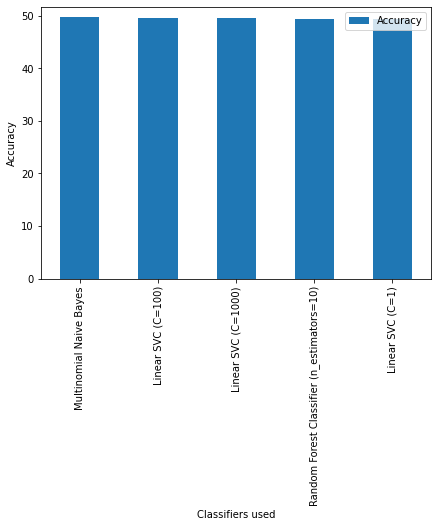

In [191]:
graph_accuracy_list = [item[1] for item in accuracy_dict_list]
graph_classifier_list = [item[0] for item in mse_dict_list]
graph_mse_list = [item[1] for item in mse_dict_list]

minY = 0;
maxY = max(graph_accuracy_list)

df = pd.DataFrame({'Accuracy': graph_accuracy_list}, index=graph_classifier_list)
ax = df.plot(figsize=(7,5), kind='bar', stacked=True)

ax. set(xlabel="Classifiers used", ylabel="Accuracy")

ax.set(ylim=[minY, maxY+2])

In [192]:
highest_accuracy_classifier = accuracy_dict_list[0]
print("Best Classifier considering highest accuracy:", highest_accuracy_classifier)

Best Classifier considering highest accuracy: ('Multinomial Naive Bayes', 49.7)


In [193]:
best_classifier_name = accuracy_dict_list[0][0]
bestClassifier = classifier_dict.get(best_classifier_name)
print(bestClassifier)



MultinomialNB(alpha=1)


In [194]:
y_pred_test = bestClassifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)*100
print("Using Best Classifier:\n")
print('Accuracy:', accuracy_test)

Using Best Classifier:

Accuracy: 85.24000000000001


In [ ]:
def rate():
    input_review = t.get()
    output.delete("all")
    print(input_review)
    mcom = {'text': [input_review]}
    mdf = pd.DataFrame(mcom, columns = ['text'])
    X_single = tfidfconverter.transform(mdf['text'])
    y_single = bestClassifier.predict(X_single)
    print("review: ", y_single[0])
    if y_single == 1:
        print('positive review')
        output.create_text(50,10, text="positive review")
    else:
        print('Negative')
        output.create_text(50,10, text="negative review")

root = tk.Tk()
root.geometry("500x250")
root.title("GUI")
root.configure(bg='black')

label2 = tk.Label(root, text= "Enter a review about the last movie you watched:", font= ('Helvetica 12 '))
label2.place(x=80 , y=70)

t = Entry(root)
t.place(x=85, y=120)

output = tk.Canvas(width="200", height=150)
output.place(x=50, y=200)

b = tk.Button(root, text="Search", command=rate)
b.place(x=220, y=160)

Label(root, text="Result : ", font=('Helvetica 10 ')).place(x=100, y=170)

display_canvas2 = tk.Canvas(root, bg="white", width=100, height=20)
display_canvas2.place(x=80, y=240)



root.mainloop()

too bad a movie
review:  0
Negative
amazing movie it is
review:  1
positive review
